Goal : predict concrete compressive strength from mixture components and age

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install xlrd

You should consider upgrading via the 'C:\Users\Digvijay singh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


load and explore data

In [3]:
df = pd.read_excel('Concrete_Data.xls')

In [4]:
df.shape

(1030, 9)

In [5]:
target_col = 'Concrete compressive strength(MPa, megapascals)'
features_col = [col for col in df.columns if col != target_col]

print(f"Target Variable: {target_col}")
print(f"Feature Names: {features_col}")

Target Variable: Concrete compressive strength(MPa, megapascals)
Feature Names: ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [8]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


feature engineering

In [9]:
df.columns = [col.split('(')[0].strip() for col in df.columns]

In [10]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


exploratory data analysis(EDA)

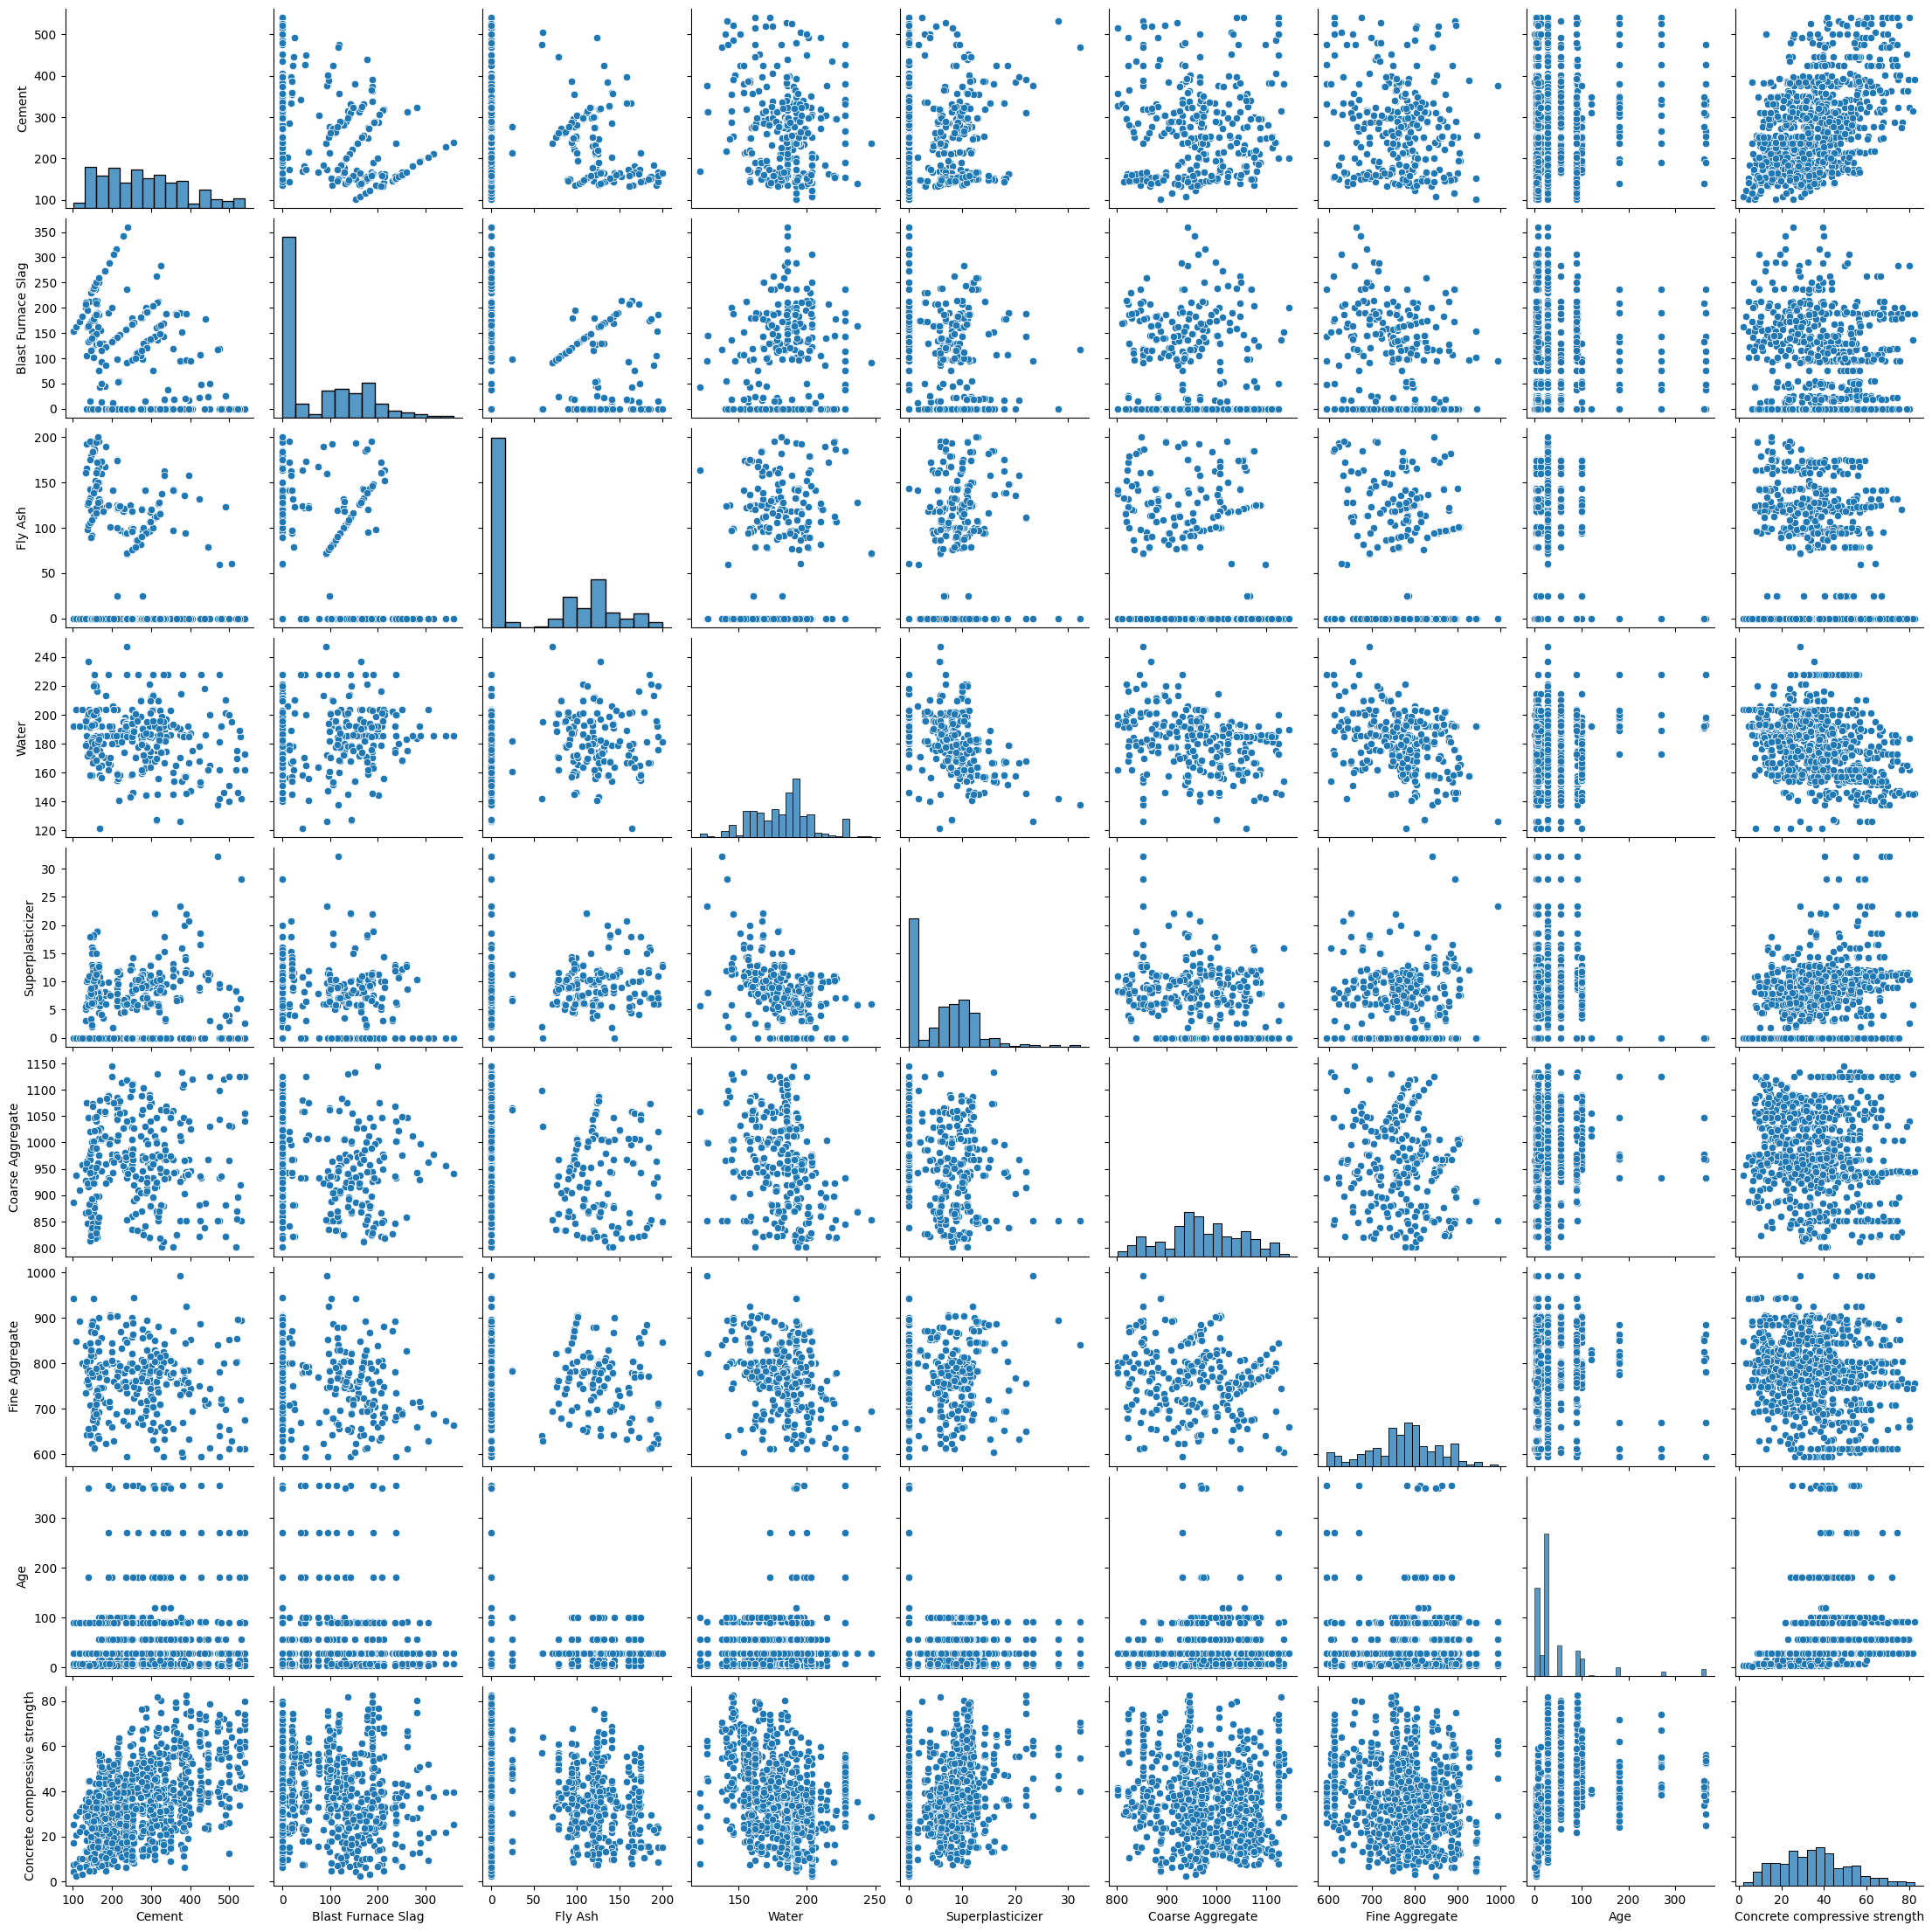

In [12]:
sns.pairplot(df)

<Axes: >

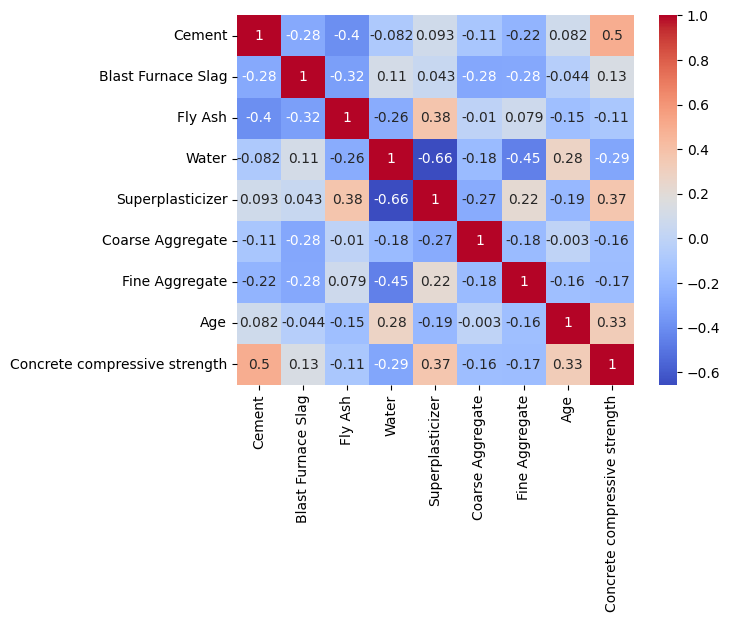

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Concrete compressive strength', ylabel='Count'>

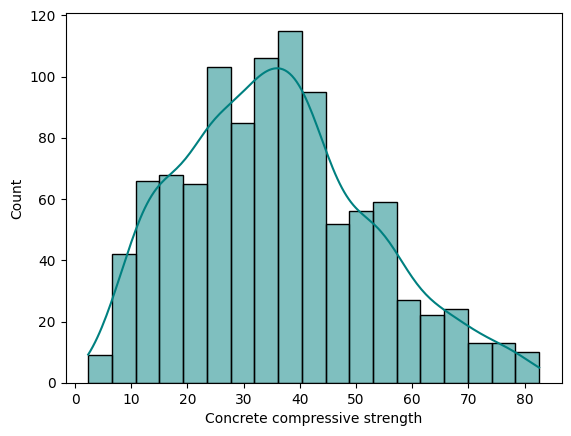

In [14]:
sns.histplot(df['Concrete compressive strength'], kde=True, color='teal')

preprocessing

In [15]:
x = df.drop('Concrete compressive strength', axis=1)
y = df['Concrete compressive strength']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.25,
    random_state=42
)

<Axes: >

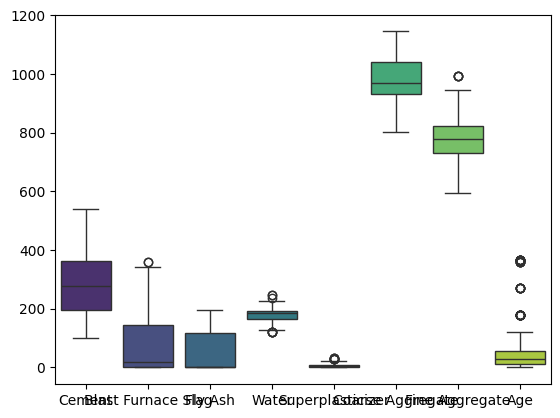

In [17]:
sns.boxplot(data=x_train, palette='viridis')

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<Axes: >

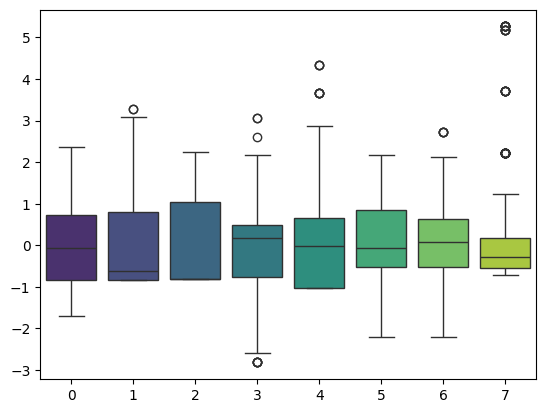

In [19]:
sns.boxplot(data=x_train ,palette='viridis')

linear regression

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [33]:
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
y_pred_linear_regression = regression.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
y_pred_elasticnet = elasticnet.predict(x_test)

In [37]:
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred_linear_regression))
score_linear_regression = r2_score(y_test, y_pred_linear_regression)
print("linear regression rmse: ", rmse_linear_regression)
print("linear regression r2 score: ", score_linear_regression)

linear regression rmse:  10.079529233497176
linear regression r2 score:  0.6249292900326934


In [39]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
score_lasso = r2_score(y_test, y_pred_lasso)
print("lasso rmse: ", rmse_lasso)
print("lasso regression r2 score: ", score_lasso)

lasso rmse:  10.948038463897621
lasso regression r2 score:  0.5575081438701296


In [40]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
score_ridge = r2_score(y_test, y_pred_ridge)
print("ridge rmse: ", rmse_ridge)
print("ridge r2 score: ", score_ridge)

ridge rmse:  10.076122832337632
ridge r2 score:  0.6251827592931669


In [41]:
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
score_elasticnet = r2_score(y_test, y_pred_elasticnet)
print("elasticnet rmse: ", rmse_elasticnet)
print("elasticnet r2 score: ", score_elasticnet)

elasticnet rmse:  11.634860636693915
elasticnet r2 score:  0.5002474436902772
